In [1]:
import sys
import pennylane as qml
from pennylane import numpy as np
from math import pi
from sklearn import datasets
import scipy
import numpy as np
import time
import math

In [2]:
numQubits = 10
depth = 9
d = 100

In [3]:
dev = qml.device("default.qubit", wires=numQubits)

In [4]:
def add_layerRZ(data):
    for i in range(numQubits):
        qml.RZ(data[i], wires = i)

def make_feature_map(data):
    for i in range(numQubits):
        qml.Hadamard(wires = i)
    add_layerRZ(data)

In [5]:
def add_cnots():
    for i in range(0, numQubits-1):
        for j in range(i+1, numQubits):
            qml.CNOT(wires = [i, j])

def add_layerRY(params):
    for qubit in range(numQubits):
        qml.RY(params[qubit], wires = qubit)
        
def make_variationalCircuit(params):
    add_cnots()
    add_layerRY(params)

In [6]:
def make_final_circuit(data, params, depth):
    make_feature_map(data)
    add_layerRY(params[0:numQubits])
    for i in range(depth):
        make_variationalCircuit(params[numQubits*(i+1):numQubits*(i+2)])

In [7]:
@qml.qnode(dev)
def qnode(params):
    make_final_circuit(data, params, depth)
    return qml.expval(qml.PauliX(1))

In [8]:
@qml.qnode(dev)
def fubini_qnode(data, params,depth):
    make_final_circuit(data, params,depth)
    return qml.state()

In [9]:
def fubini_calculate(data, params,depth):
    fubini = np.zeros([d, d], dtype=np.float64)
    base = np.conj(fubini_qnode(data,params,depth))
    for i in range(d):
        for j in range(d):
            params[i] += np.pi/2
            params[j] += np.pi/2
            plusplus = np.abs(np.dot(base, fubini_qnode(data, params,depth))) ** 2
            params[j] -= np.pi
            plusminus = np.abs(np.dot(base, fubini_qnode(data, params,depth))) ** 2
            params[i] -= np.pi
            minusminus = np.abs(np.dot(base, fubini_qnode(data, params,depth))) ** 2
            params[j] += np.pi
            minusplus = np.abs(np.dot(base, fubini_qnode(data, params,depth))) ** 2
            fubini[i, j] = (-plusplus-minusminus+plusminus+minusplus)/8
            params[i] += np.pi/2
            params[j] -= np.pi/2
    return fubini

In [10]:
fubini_matrices = []
eigen_vals = []

In [11]:
np.random.seed(0)
params = np.random.uniform(-1, 1, d)

In [ ]:
start_qfi = time.time()

for i in range(10) :
    data = np.random.uniform(-1, 1, numQubits)
    print(data)
    fubini = fubini_calculate(data, params, depth)
    print(fubini)
    fubini_matrices.append(fubini)
    eigvals,eigvecs=scipy.linalg.eigh(fubini)
    eigen_vals.append(eigvals)
    
end_qfi = time.time()
print(end_qfi - start_qfi)

[ 0.35563307 -0.45998405  0.47038804  0.92437709 -0.50249371  0.15231467
  0.18408386  0.14450381 -0.55383673  0.90549802]


In [ ]:
len(eigen_vals)

In [ ]:
eigen_values = []
for i in range(len(eigen_vals)):
    for j in range(len(eigen_vals[0])):
        eigen_values.append(4*eigen_vals[i][j])

In [ ]:
len(eigen_values)

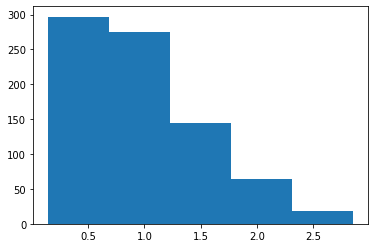

In [23]:
import matplotlib.pyplot as plt
plt.hist(eigen_values, bins = 5)
plt.show()

In [24]:
eigvals_bw01=[eigen_values[i] for i in range(len(eigen_values)) if eigen_values[i] <= 1]

In [25]:
eigvals_bw01

[0.15420652725980344,
 0.1881676029900929,
 0.22373784800878965,
 0.2704861506569334,
 0.28524973536294473,
 0.31905745285165094,
 0.3517368570522318,
 0.3619087936909198,
 0.3687205153281816,
 0.38548815961509836,
 0.39088097263580945,
 0.4067441614212951,
 0.42617267991862834,
 0.4453743406070955,
 0.4563760791170101,
 0.46736747630166053,
 0.4963196523591322,
 0.508227752007169,
 0.5393651609175201,
 0.5504206957178135,
 0.5628327303021585,
 0.564935395408348,
 0.5881475195595305,
 0.5947650743004675,
 0.6144335807124992,
 0.6300004595385122,
 0.6410488721783079,
 0.6461875024895909,
 0.6694840156532704,
 0.701689163904409,
 0.7103538302727477,
 0.7196375812096559,
 0.742233968132294,
 0.7471042628581421,
 0.7843989101724407,
 0.7876715378589816,
 0.8092656921741554,
 0.823622613686092,
 0.8429786112694275,
 0.8535337229339928,
 0.8615347506055024,
 0.8808827477197778,
 0.9022610854098418,
 0.9268388724036322,
 0.9512344296560313,
 0.9600085681045211,
 0.9878783002137895,
 0.1808956

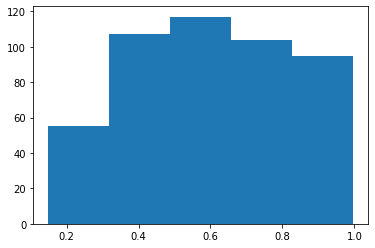

In [26]:
import matplotlib.pyplot as plt
plt.hist(eigvals_bw01, bins = 5)
plt.show()

In [27]:
eigen_values

[0.15420652725980344,
 0.1881676029900929,
 0.22373784800878965,
 0.2704861506569334,
 0.28524973536294473,
 0.31905745285165094,
 0.3517368570522318,
 0.3619087936909198,
 0.3687205153281816,
 0.38548815961509836,
 0.39088097263580945,
 0.4067441614212951,
 0.42617267991862834,
 0.4453743406070955,
 0.4563760791170101,
 0.46736747630166053,
 0.4963196523591322,
 0.508227752007169,
 0.5393651609175201,
 0.5504206957178135,
 0.5628327303021585,
 0.564935395408348,
 0.5881475195595305,
 0.5947650743004675,
 0.6144335807124992,
 0.6300004595385122,
 0.6410488721783079,
 0.6461875024895909,
 0.6694840156532704,
 0.701689163904409,
 0.7103538302727477,
 0.7196375812096559,
 0.742233968132294,
 0.7471042628581421,
 0.7843989101724407,
 0.7876715378589816,
 0.8092656921741554,
 0.823622613686092,
 0.8429786112694275,
 0.8535337229339928,
 0.8615347506055024,
 0.8808827477197778,
 0.9022610854098418,
 0.9268388724036322,
 0.9512344296560313,
 0.9600085681045211,
 0.9878783002137895,
 1.0032031